<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Data Science Basics in Python

### Distribution Transformations

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)


### Distribution Transformations in Python 

Here's a simple workflow, demonstration of bootstrap for modeling workflows. This should help you get started with this important data analytics method to evaluate and integrate uncertainty for any statistic or model.  

#### Data Distribution Transformations

Why do we perform distribution transformations?

* variable has expected shape / correcting for too few data
* a specific distribution assumption is required
* correct for outliers

How do we perform distribution transformations?:

There are a variety of transformations. In general we are transforming the values from the cumulative distribution function (CDF), $F_{X}$, to a new CDF , $G_{Y}$. This can be generalized with the quantile - quantile transformation applied to all the sample data:   

* The forward transform:

\begin{equation}
Y = G_{Y}^{-1}(F_{X}(X))
\end{equation}

* The reverse transform:

\begin{equation}
X = F_{X}^{-1}(G_{Y}(Y))
\end{equation}

This may be applied to any data, nonparametric or samples from a parametric distribution. We just need to be able to map from one distribution to another through percentiles, so it is a:

* Rank preserving transform

We will cover three examples including:

1. Distribution rescaling
2. Normal score transform

#### Caveats

I included methods that I have found useful for building my science and engineering workflows for subsurface modeling. 

* Accessibility for most scientists and engineers is my goal. 
* There are more advanced, more compact, more efficient methods to accomplish the same tasks. 
* I appreciate feedback and I will use it to improve these walk-throughs.

#### Load and Configure the Required Libraries

Let's start with my GeostatsPy package. It has a good Gaussian transformation algorithm.

In [1]:
import geostatspy.GSLIB as GSLIB          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats    # GSLIB methods convert to Python     

Now let's load standard packages for working with tabular and gridded data along with data visualization.

In [2]:
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import os                                 # set working directory, run executables
import matplotlib.pyplot as plt           # for plotting
from scipy import stats                   # summary statistics

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [3]:
#os.chdir("c:/PGE383/Examples")             # set the working directory

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object.  

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/sample_data_MV_biased.csv') # load the datafile  
df.head()

,Unnamed: 0,X,Y,Facies,Porosity,Perm,AI
0,0,100.0,900.0,0.0,0.101319,1.996868,5590.417154
1,1,100.0,800.0,1.0,0.147676,10.711789,3470.845666
2,2,100.0,700.0,1.0,0.145912,17.818143,3586.988513
3,3,100.0,600.0,1.0,0.186167,217.109365,3732.114787
4,4,100.0,500.0,1.0,0.146088,16.717367,2534.551236


#### Gaussian Transformation 'by-Hand'

Let's use basic code to perform a Gaussian transformation, step by step!

1. for each data value calculate the cumulative percentile
2. use the inverse of the Gaussian CDF to look up the value in Gaussian space for each percentile

Here we transform the porosity feature to have the same distribution a parametric Gaussian distribution.

To try out transformation to a nonparametric distribution change the commented out code to:

```python
#df['NPorosity'] = stats.norm.ppf(percentile,loc=mean,scale=stdev)           # inverse of Gaussian distribution
df['NPorosity'] = np.percentile(df['Perm'].values,percentile*100)           # inverse of a non parametric distribution
```
and you will transform porosity to have the same distribution as permeability!

In [8]:
mean = 0.0; stdev = 1.0

percentile = df["Porosity"].rank()/(len(df)+1)                              # unknown lower and upper tail
# percentile = (df["Porosity"].rank() - 1)/(len(df)-1)                      # known lower and upper tail
# percentile = df["Porosity"].rank()/len(df)                                # unknown lower tail
# percentile = (df["Porosity"].rank()-1)/len(df)                            # unknown upper tail

df['NPorosity'] = stats.norm.ppf(percentile,loc=mean,scale=stdev)           # inverse of Gaussian distribution
#df['NPorosity'] = np.percentile(df['Perm'].values,percentile*100)          # inverse of a non parametric distribution

Now let's visualize the original and transformed feature distributions.

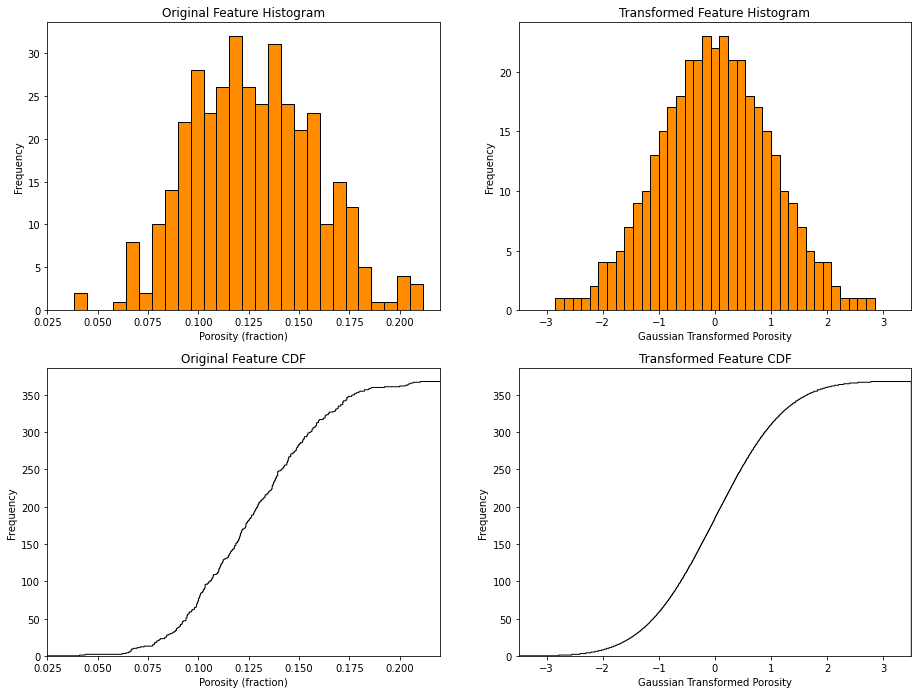

In [9]:
plt.subplot(221)
plt.hist(df['Porosity'],color='darkorange',edgecolor='black',alpha=1.0,bins=np.linspace(0.0,0.25,40))
plt.xlabel('Porosity (fraction)'); plt.ylabel('Frequency'); plt.title('Original Feature Histogram')
plt.xlim([0.025,0.22])

plt.subplot(222)
plt.hist(df['NPorosity'],color='darkorange',edgecolor='black',alpha=1.0,bins=np.linspace(-3,3,40))
plt.xlabel('Gaussian Transformed Porosity'); plt.ylabel('Frequency'); plt.title('Transformed Feature Histogram')
plt.xlim([-3.5,3.5])

plt.subplot(223)
plt.hist(df['Porosity'],color='red',edgecolor='black',alpha=1.0,bins=np.linspace(0.0,0.25,1000),cumulative=True,histtype='step')
plt.xlabel('Porosity (fraction)'); plt.ylabel('Frequency'); plt.title('Original Feature CDF')
plt.xlim([0.025,0.22])

plt.subplot(224)
plt.hist(df['NPorosity'],color='red',edgecolor='black',alpha=1.0,bins=np.linspace(-3.5,3.5,1000),cumulative=True,histtype='step')
plt.xlabel('Gaussian Transformed Porosity'); plt.ylabel('Frequency'); plt.title('Transformed Feature CDF')
plt.xlim([-3.5,3.5])

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.2, wspace=0.2, hspace=0.2); plt.show()

Let's calculate and look at the Q-Q plot.

* since each value in original Porosity feature is linked to the values in the new transformed NPorosity feature, we can just scatter plot them.

* note the units are very different so the position and slope are not helpful, but departure from a straight line inidcates a change in shape.

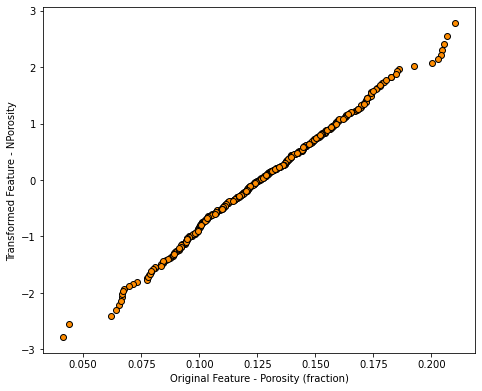

In [10]:
plt.subplot(111)
plt.scatter(df['Porosity'].values,df['NPorosity'].values,color='darkorange',edgecolor='black')
plt.xlabel('Original Feature - Porosity (fraction)'); plt.ylabel('Transformed Feature - NPorosity')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.2, hspace=0.2); plt.show()

#### Gaussian Transformation with GeostatsPy

The GeostatsPy package (Pyrcz et al., 2021) has a Gaussian transformation function based on the original Geostatistical Library (GSLIB, Deutsch and Journel, 1997).

In [12]:
df['NPorosity_GeostatsPy'], tran_vr, tran_ns = geostats.nscore(df,'Porosity')

Let's visualize the transformed feature.

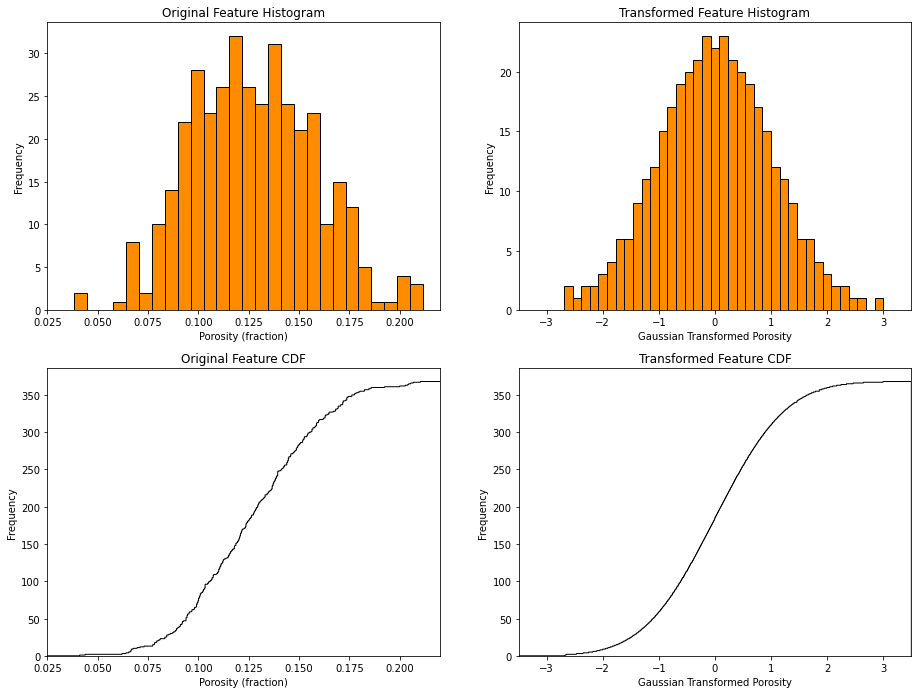

In [13]:
plt.subplot(221)
plt.hist(df['Porosity'],color='darkorange',edgecolor='black',alpha=1.0,bins=np.linspace(0.0,0.25,40))
plt.xlabel('Porosity (fraction)'); plt.ylabel('Frequency'); plt.title('Original Feature Histogram')
plt.xlim([0.025,0.22])

plt.subplot(222)
plt.hist(df['NPorosity_GeostatsPy'],color='darkorange',edgecolor='black',alpha=1.0,bins=np.linspace(-3,3,40))
plt.xlabel('Gaussian Transformed Porosity'); plt.ylabel('Frequency'); plt.title('Transformed Feature Histogram')
plt.xlim([-3.5,3.5])

plt.subplot(223)
plt.hist(df['Porosity'],color='red',edgecolor='black',alpha=1.0,bins=np.linspace(0.0,0.25,1000),cumulative=True,histtype='step')
plt.xlabel('Porosity (fraction)'); plt.ylabel('Frequency'); plt.title('Original Feature CDF')
plt.xlim([0.025,0.22])

plt.subplot(224)
plt.hist(df['NPorosity_GeostatsPy'],color='red',edgecolor='black',alpha=1.0,bins=np.linspace(-3.5,3.5,1000),cumulative=True,histtype='step')
plt.xlabel('Gaussian Transformed Porosity'); plt.ylabel('Frequency'); plt.title('Transformed Feature CDF')
plt.xlim([-3.5,3.5])

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.2, wspace=0.2, hspace=0.2); plt.show()

#### Comments

This was a basic demonstration of distribution transformations.

I have other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations, trend modeling and many other workflows available at https://github.com/GeostatsGuy/PythonNumericalDemos and https://github.com/GeostatsGuy/GeostatsPy. 
  
I hope this was helpful,

*Michael*

#### The Author:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
